In [2]:
import requests

# for i in range(1, 13):
#     i_str = str(i)
#     if i % 10 == i:
#         i_str = '0'+i_str
#     url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=60min&month=2022-{i_str}&outputsize=full&apikey=2TU3VVSS2DD06FED&datatype=csv'
#     r = requests.get(url, allow_redirects=True)
#     open(f'train_data/60min_MSFT_2022_{i_str}.csv', 'wb').write(r.content)

# for i in range(1, 13):
#     i_str = str(i)
#     if i % 10 == i:
#         i_str = '0'+i_str
#     url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=60min&month=2023-{i_str}&outputsize=full&apikey=2TU3VVSS2DD06FED&datatype=csv'
#     r = requests.get(url, allow_redirects=True)
#     open(f'train_data/60min_MSFT_2023_{i_str}.csv', 'wb').write(r.content)

# for i in range(1, 5):
#     i_str = str(i)
#     if i % 10 == i:
#         i_str = '0'+i_str
#     url = f'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=MSFT&interval=60min&month=2024-{i_str}&outputsize=full&apikey=2TU3VVSS2DD06FED&datatype=csv'
#     r = requests.get(url, allow_redirects=True)
#     open(f'train_data/60min_MSFT_2024_{i_str}.csv', 'wb').write(r.content)

<h2 style='text-align: center;'> Dependencies </h2>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from vmdpy import VMD

In [4]:
frames = []
for i in range(1, 13):
    i_str = str(i)
    if i % 10 == i:
        i_str = '0'+i_str
    frames.append(pd.read_csv(f'train_data/60min_MSFT_2022_{i_str}.csv', index_col='timestamp').iloc[::-1])

for i in range(1, 13):
    i_str = str(i)
    if i % 10 == i:
        i_str = '0'+i_str
    frames.append(pd.read_csv(f'train_data/60min_MSFT_2023_{i_str}.csv', index_col='timestamp').iloc[::-1])

for i in range(1, 3):
    i_str = str(i)
    if i % 10 == i:
        i_str = '0'+i_str
    frames.append(pd.read_csv(f'train_data/60min_MSFT_2024_{i_str}.csv', index_col='timestamp').iloc[::-1])
stockprices = pd.concat(frames)

stockprices['close'].to_numpy()

array([329.999, 330.45 , 331.077, ..., 413.045, 412.65 , 412.68 ])

In [5]:
test_ratio = 0.2
train_ratio = 1 - test_ratio

train_size = int(train_ratio *len(stockprices))
test_size = int(test_ratio * len(stockprices))

train_data = stockprices[:train_size]
test_data = stockprices[train_size+50:]

<h2 style='text-align: center;'> Vector Mode Decomposition </h2>

In [6]:
alpha = 5000      # moderate bandwidth constraint  
tau = 0           # noise-tolerance (no strict fidelity enforcement)  
K = 5              # 5 modes  
DC = 0             # no DC part imposed  
init = 1           # initialize omegas uniformly  
tol = 1e-7

signals, u_hat, omega = VMD(stockprices['close'].to_numpy(), alpha, tau, K, DC, init, tol)

for i, signal in enumerate(signals):
    stockprices[f'signal{i}'] = signal

stockprices

,open,high,low,close,volume,signal0,signal1,signal2,signal3,signal4
timestamp,,,,,,,,,,
2022-01-03 04:00:00,331.293,331.731,329.706,329.999,11038,310.606063,15.518743,2.320966,0.605329,-0.095304
2022-01-03 05:00:00,330.097,330.516,329.941,330.450,7932,310.597736,15.502382,2.311022,0.531978,0.236834
2022-01-03 06:00:00,330.656,331.320,330.578,331.077,4154,310.578326,15.466863,2.288218,0.388599,-0.240601
2022-01-03 07:00:00,330.803,331.143,330.725,330.881,11983,310.539806,15.404147,2.244583,0.180267,0.117789
2022-01-03 08:00:00,331.048,331.231,329.373,329.431,40914,310.482274,15.314690,2.182248,-0.068207,0.110872
...,...,...,...,...,...,...,...,...,...,...
2024-02-29 15:00:00,409.900,414.200,409.660,413.420,5649487,408.712390,-0.753388,2.634594,0.901737,0.053926
2024-02-29 16:00:00,413.420,428.724,397.894,412.800,25685638,408.725767,-0.738140,2.765861,1.232744,-0.036633
2024-02-29 17:00:00,412.800,413.640,412.800,413.045,100266,408.731242,-0.731371,2.860267,1.490969,0.020709


<h2 style='text-align: center;'> LSTM </h2>

In [7]:
def get_rmse(y_true, pred):
    return np.sqrt(np.mean((y_true - pred) ** 2))

def get_mape(y_true, pred):
    pred, y_true = np.array(pred), np.array(y_true)
    return np.mean(np.abs(y_true - pred) / y_true) * 100

In [8]:
def get_perf_metrics(train_size, var):
    rmse = get_rmse(
        np.array(stockprices[train_size:]["close"]),
        np.array(stockprices[train_size:][var]),
    )
    ### MAPE
    mape = get_mape(
        np.array(stockprices[train_size:]["close"]),
        np.array(stockprices[train_size:][var]),
    )
    return rmse, mape

In [9]:
def extract_x_y(data, N, offset, future_steps):
    X, y = [], []

    for i in range(offset, len(data) - future_steps + 1):
        X.append(data[i - N: i, 1:])
        y.append(data[i+future_steps-1, 0])
    return np.array(X), np.array(y)

In [12]:
layer_units = 200
optimize_func = 'adam'
curr_epochs = 25 # Should be 2000 according to the paper.
curr_batch_size = 20
window_size = 50
future_steps = 5

#normalizes signal data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(stockprices[['close', 'signal0', 'signal1', 'signal2', 'signal3', 'signal4']])
scaled_data_train = scaled_data[:train_data.shape[0]]
X_train, y_train = extract_x_y(scaled_data_train, window_size, window_size, future_steps)

In [13]:
def run_LSTM(X_train, layer_units):
    inp = tf.keras.layers.Input(shape=(X_train.shape[1], 5))

    x = tf.keras.layers.LSTM(units=layer_units, return_sequences=True)(inp)
    x = tf.keras.layers.LSTM(units=layer_units, return_sequences=True)(x)
    x = tf.keras.layers.LSTM(units=layer_units)(x)
    output = tf.keras.layers.Dense(1, activation='linear')(x)
    
    model = tf.keras.Model(inp,output)
    model.compile(loss='mean_squared_error', optimizer=optimize_func)

    return model

model = run_LSTM(X_train, layer_units)
history = model.fit(
    X_train,
    y_train,
    epochs=curr_epochs,
    batch_size=curr_batch_size,
    verbose=1,
    validation_split=0.1,
    shuffle=True,
)

Epoch 1/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 32s 95ms/step - loss: 0.0281 - val_loss: 0.0028
Epoch 2/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 29s 92ms/step - loss: 0.0024 - val_loss: 0.0011
Epoch 3/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 28s 91ms/step - loss: 0.0022 - val_loss: 8.8810e-04
Epoch 4/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - loss: 0.0021 - val_loss: 7.0266e-04
Epoch 5/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 6/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 27s 88ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 7/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 8/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 9/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 28s 89ms/step - loss: 0.0014 - val_loss: 0.0016
Epoch 10/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - loss: 0.0017 - val_loss: 0.0066
Epoch 11/25
310/310 ━━━━━━━━━━━━━━━━━━━━ 29s 93ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 12/25
310/310 ━━

In [17]:
def preprocess_data(data=stockprices, scaler=scaler, window_size=window_size, test=test_data):
    raw = data[['close','signal0', 'signal1', 'signal2', 'signal3', 'signal4']][len(data) - len(test) - window_size:].values
    raw = scaler.fit_transform(raw)
    X_test = [raw[i-window_size:i, 1:] for i in range(window_size, raw.shape[0])]
    X_test = np.array(X_test)
    print(X_test.shape)
    
    return X_test

X_test = preprocess_data()
predicted_price_ = model.predict(X_test)
# Post-processing to fit scaler expectations
full_dummy_features = np.zeros((predicted_price_.shape[0], 6))  # Create a dummy array with the same number of columns as the scaler expects
full_dummy_features[:, 0] = predicted_price_.ravel()  # Assuming 'close' is the first column

# Inverse transform
predicted_price = scaler.inverse_transform(full_dummy_features)[:, 0]  # Inverse transform and select only the 'close' column

test_data.loc[:future_steps-1, "Predictions_lstm"] = None
test_data.loc[future_steps:, "Predictions_lstm"] = predicted_price[:-future_steps]

(1682, 50, 5)
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step


C:\Users\Jorge Tomaylla\AppData\Local\Temp\ipykernel_46200\3222615080.py:19: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  test_data.loc[:future_steps-1, "Predictions_lstm"] = None
C:\Users\Jorge Tomaylla\AppData\Local\Temp\ipykernel_46200\3222615080.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:future_steps-1, "Predictions_lstm"] = None
C:\Users\Jorge Tomaylla\AppData\Local\Temp\ipykernel_46200\3222615080.py:20: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  test_data.loc[fut

LSTM Model RMSE: 2.52
LSTM Model MAPE: 0.55%


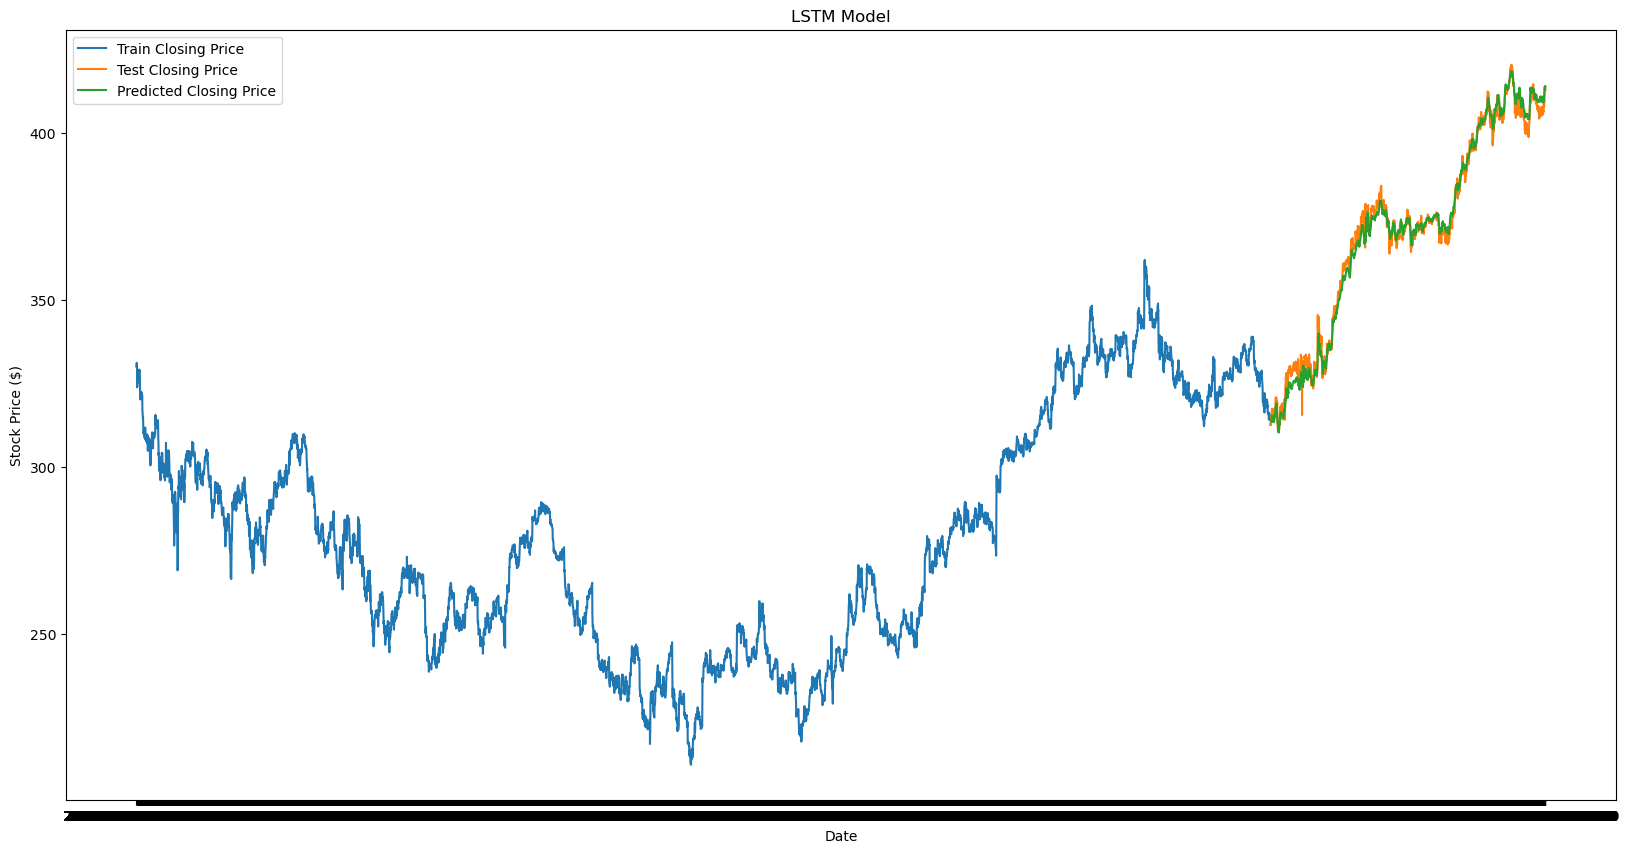

In [18]:
rmse_lstm = get_rmse(np.array(test_data.iloc[future_steps:, test_data.columns.get_loc("close")]), 
                     np.array(test_data.iloc[future_steps:, test_data.columns.get_loc("Predictions_lstm")]))
mape_lstm = get_mape(np.array(test_data.iloc[future_steps:, test_data.columns.get_loc("close")]), 
                     np.array(test_data.iloc[future_steps:, test_data.columns.get_loc("Predictions_lstm")]))
def plot_stock_trend_lstm(train, test):
    fig = plt.figure(figsize = (20,10))
    plt.plot(np.asarray(train.index), np.asarray(train["close"]), label = "Train Closing Price")
    plt.plot(np.asarray(test.index), np.asarray(test["close"]), label = "Test Closing Price")
    plt.plot(np.asarray(test.index), np.asarray(test["Predictions_lstm"]), label = "Predicted Closing Price")
    plt.title("LSTM Model")
    plt.xlabel("Date")
    plt.ylabel("Stock Price ($)")
    plt.legend(loc="upper left")

plot_stock_trend_lstm(train_data, test_data)

print(f"LSTM Model RMSE: {round(rmse_lstm, 2)}")
print(f"LSTM Model MAPE: {round(mape_lstm, 2)}%")

In [19]:
model.save('trained_models/LSTM_Price_Predictor_Trial.keras')